<a href="https://colab.research.google.com/github/KrisMatrix/TensorFlow_Certification_Prep/blob/main/Kaggle_Exercises/MedicalPremium_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Premium Dataset

This dataset comes from kaggle.
Link: https://www.kaggle.com/tejashvi14/medical-insurance-premium-prediction?select=Medicalpremium.csv

## Become one with the data.

Understand the dataset. This is medical information. There is just one dataset file in csv format. Let's read it using pandas and understand the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [2]:
!wget https://raw.githubusercontent.com/KrisMatrix/TensorFlow_Certification_Prep/main/Kaggle_Exercises/Medicalpremium.csv

--2021-08-15 17:56:39--  https://raw.githubusercontent.com/KrisMatrix/TensorFlow_Certification_Prep/main/Kaggle_Exercises/Medicalpremium.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30772 (30K) [text/plain]
Saving to: ‘Medicalpremium.csv.2’

Medicalpremium.csv. 100%[===================>]  30.05K  --.-KB/s    in 0s      

2021-08-15 17:56:39 (115 MB/s) - ‘Medicalpremium.csv.2’ saved [30772/30772]



In [3]:
df = pd.read_csv("Medicalpremium.csv")  #df is a DataFrame
df.head() #show a few lines of data

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [4]:
len(df) #How many rows?

986

There are 986 rows. One of them is a header. So we have 985 rows of data.

In [5]:
df.tail

<bound method NDFrame.tail of      Age  Diabetes  ...  NumberOfMajorSurgeries  PremiumPrice
0     45         0  ...                       0         25000
1     60         1  ...                       0         29000
2     36         1  ...                       1         23000
3     52         1  ...                       2         28000
4     38         0  ...                       1         23000
..   ...       ...  ...                     ...           ...
981   18         0  ...                       0         15000
982   64         1  ...                       3         28000
983   56         0  ...                       1         29000
984   47         1  ...                       1         39000
985   21         0  ...                       1         15000

[986 rows x 11 columns]>

In [6]:
df.columns #The headers of the data.

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [7]:
len(df.columns)

11

We so we have 986 rows of data. This may include the header row, which is the labels. There are 11 columns of data.

This dataset tells us the physical and medical characteristics of several patients, and what their insurance premium costs are.

So, we want to create an input matrix X that is rows x 10 and the output will be rows x 1, where the 1 is the premium price. 

We want to create a model, that will allow us to predict a patients premium price.

This appears to be a NN regression problem.

Thankfully all of our data area already numbers. There are no texts in the data (not including the headers).

Let's start by splitting the data into training and test. We will split 75/25

In [8]:
df 

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


In [9]:
#We want the input matrix. We drop/remove the Premium Price
X = df.drop("PremiumPrice", axis=1)
X

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
0,45,0,0,0,0,155,57,0,0,0
1,60,1,0,0,0,180,73,0,0,0
2,36,1,1,0,0,158,59,0,0,1
3,52,1,1,0,1,183,93,0,0,2
4,38,0,0,0,1,166,88,0,0,1
...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0
982,64,1,1,0,0,153,70,0,0,3
983,56,0,1,0,0,155,71,0,0,1
984,47,1,1,0,0,158,73,1,0,1


In [10]:
#y is the result data. In this case, the Prem
y = df["PremiumPrice"]
y.head()

0    25000
1    29000
2    23000
3    28000
4    23000
Name: PremiumPrice, dtype: int64

In [11]:
X.shape, y.shape

((986, 10), (986,))

Let's analyze the data further with some plots.

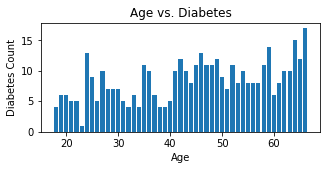

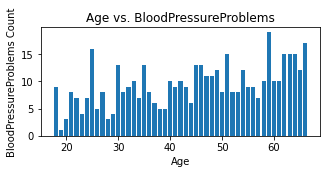

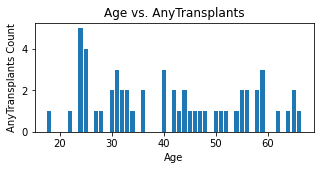

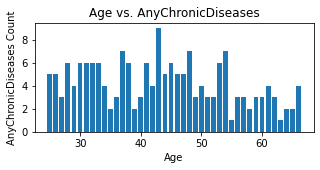

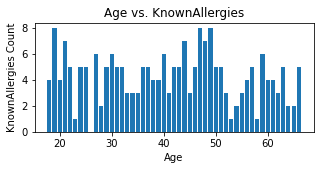

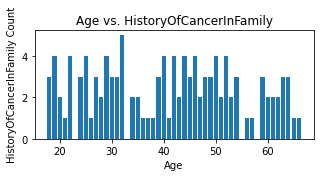

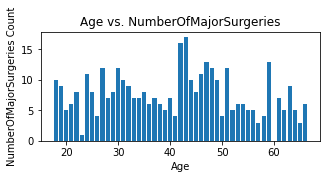

In [12]:
def hist_plot(X, column_names):
  for column_name in column_names:  
    #what do we want to do here?
    #On a X-axis with age, we want to plot count of diabetes, Blood Pressure, etc.
    metric = {}
    for i in range(0, len(X[column_name])):  #step through rows
      if X[column_name][i] == 1 and X['Age'][i] in metric.keys():
        metric[X['Age'][i]] += 1
      elif X[column_name][i] == 1:
        metric[X['Age'][i]] = 1
    plt.figure(figsize=(5,2))
    plt.bar(metric.keys(), metric.values())
    plt.title("Age vs. "+column_name)
    plt.xlabel("Age")
    plt.ylabel(column_name+" Count")

column_names = list(df.columns.values)
column_names.remove("Age")
column_names.remove("Height")
column_names.remove("Weight")
column_names.remove("PremiumPrice")
hist_plot(X,column_names)

In [13]:
# Split 75/25 percent
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((739, 10), (247, 10), (739,), (247,))

In [15]:
#Get tensorflow version
tf.__version__

'2.5.0'

Ok. Now we have our data split into training and test sets. Let's build the model. 

In [16]:
# Set random seed
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

history_1 = model_1.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
24/24 [==============================] - 0s 2ms/step - loss: 24152.5098 - mae: 24152.5098
Epoch 2/1000
24/24 [==============================] - 0s 1ms/step - loss: 24145.5625 - mae: 24145.5625
Epoch 3/1000
24/24 [==============================] - 0s 1ms/step - loss: 24138.6094 - mae: 24138.6094
Epoch 4/1000
24/24 [==============================] - 0s 1ms/step - loss: 24131.6504 - mae: 24131.6504
Epoch 5/1000
24/24 [==============================] - 0s 1ms/step - loss: 24124.6953 - mae: 24124.6953
Epoch 6/1000
24/24 [==============================] - 0s 2ms/step - loss: 24117.7383 - mae: 24117.7383
Epoch 7/1000
24/24 [==============================] - 0s 2ms/step - loss: 24110.7734 - mae: 24110.7734
Epoch 8/1000
24/24 [==============================] - 0s 1ms/step - loss: 24103.8242 - mae: 24103.8242
Epoch 9/1000
24/24 [==============================] - 0s 2ms/step - loss: 24096.8770 - mae: 24096.8770
Epoch 10/1000
24/24 [==============================] - 0s 2ms/step - loss

In [17]:
model_1.evaluate(X_test,y_test)

8/8 [==============================] - 0s 2ms/step - loss: 17915.7480 - mae: 17915.7480


[17915.748046875, 17915.748046875]

Text(0.5, 1.0, 'Loss vs. Epochs')

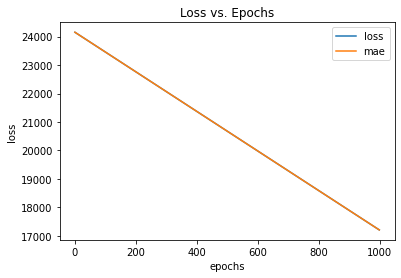

In [18]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.title("Loss vs. Epochs")

In [19]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1100      
Total params: 1,100
Trainable params: 1,100
Non-trainable params: 0
_________________________________________________________________


With model_1 we run for a 1000 epochs and have just one Dense(100) layers.

With model_2, we will add a activation="relu" and reduce to 1 layer.


In [20]:
# Set random seed
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="relu")
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

history_2 = model_2.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
24/24 [==============================] - 0s 1ms/step - loss: 24105.6445 - mae: 24105.6445
Epoch 2/1000
24/24 [==============================] - 0s 1ms/step - loss: 24028.4336 - mae: 24028.4336
Epoch 3/1000
24/24 [==============================] - 0s 1ms/step - loss: 23932.5449 - mae: 23932.5449
Epoch 4/1000
24/24 [==============================] - 0s 1ms/step - loss: 23811.0156 - mae: 23811.0156
Epoch 5/1000
24/24 [==============================] - 0s 1ms/step - loss: 23660.9766 - mae: 23660.9766
Epoch 6/1000
24/24 [==============================] - 0s 2ms/step - loss: 23478.5488 - mae: 23478.5488
Epoch 7/1000
24/24 [==============================] - 0s 1ms/step - loss: 23261.1309 - mae: 23261.1309
Epoch 8/1000
24/24 [==============================] - 0s 1ms/step - loss: 23007.2578 - mae: 23007.2578
Epoch 9/1000
24/24 [==============================] - 0s 2ms/step - loss: 22715.6348 - mae: 22715.6348
Epoch 10/1000
24/24 [==============================] - 0s 1ms/step - loss

In [21]:
model_2.evaluate(X_test,y_test)

8/8 [==============================] - 0s 2ms/step - loss: 2799.7576 - mae: 2799.7576


[2799.757568359375, 2799.757568359375]

Text(0.5, 1.0, 'Loss vs. Epochs')

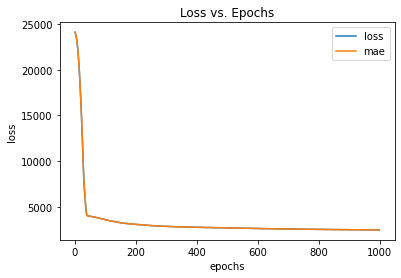

In [22]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.title("Loss vs. Epochs")

In [23]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


Observe that the loss reduces significantly. It seems that it flattens out around 200 epochs. So we can probably make do by  reducing the epoch count to 200.

In [24]:
# Set random seed
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  #tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1,)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

history_3 = model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
24/24 [==============================] - 0s 2ms/step - loss: 24105.6445 - mae: 24105.6445
Epoch 2/200
24/24 [==============================] - 0s 1ms/step - loss: 24028.4336 - mae: 24028.4336
Epoch 3/200
24/24 [==============================] - 0s 1ms/step - loss: 23932.5449 - mae: 23932.5449
Epoch 4/200
24/24 [==============================] - 0s 1ms/step - loss: 23811.0156 - mae: 23811.0156
Epoch 5/200
24/24 [==============================] - 0s 2ms/step - loss: 23660.9766 - mae: 23660.9766
Epoch 6/200
24/24 [==============================] - 0s 1ms/step - loss: 23478.5488 - mae: 23478.5488
Epoch 7/200
24/24 [==============================] - 0s 2ms/step - loss: 23261.1309 - mae: 23261.1309
Epoch 8/200
24/24 [==============================] - 0s 2ms/step - loss: 23007.2578 - mae: 23007.2578
Epoch 9/200
24/24 [==============================] - 0s 1ms/step - loss: 22715.6348 - mae: 22715.6348
Epoch 10/200
24/24 [==============================] - 0s 2ms/step - loss: 22385.03

In [25]:
model_3.evaluate(X_test,y_test)

8/8 [==============================] - 0s 2ms/step - loss: 3431.9165 - mae: 3431.9165


[3431.91650390625, 3431.91650390625]

Text(0.5, 1.0, 'Loss vs. Epochs')

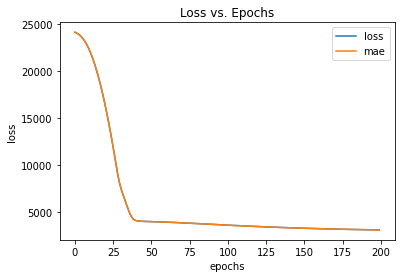

In [26]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.title("Loss vs. Epochs")

In [27]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


Let's try normalizing the data.

In [28]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [29]:
tf.reduce_max(df["Age"]), tf.reduce_min(df["Age"])

(<tf.Tensor: shape=(), dtype=int64, numpy=66>,
 <tf.Tensor: shape=(), dtype=int64, numpy=18>)

Let's find out what the max and min values are for every column in the data. This should help us understand which columns need to be normalized.

In [30]:
for label in df.columns:
  print(f"Label: {label} has max: {tf.reduce_max(df[label])} and has min: {tf.reduce_min(df[label])}")

Label: Age has max: 66 and has min: 18
Label: Diabetes has max: 1 and has min: 0
Label: BloodPressureProblems has max: 1 and has min: 0
Label: AnyTransplants has max: 1 and has min: 0
Label: AnyChronicDiseases has max: 1 and has min: 0
Label: Height has max: 188 and has min: 145
Label: Weight has max: 132 and has min: 51
Label: KnownAllergies has max: 1 and has min: 0
Label: HistoryOfCancerInFamily has max: 1 and has min: 0
Label: NumberOfMajorSurgeries has max: 3 and has min: 0
Label: PremiumPrice has max: 40000 and has min: 15000


From the above for loop, we see that Age, Height, Weight, and Premium Price are the only ones with values outside of [0,1] range. So we should normalize those.

In [31]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    #(MinMaxScaler(), ["Age", "Height", "Weight"]), # get all values between 0 and 1
    (MinMaxScaler(), ["Age", "Diabetes", "BloodPressureProblems", "AnyTransplants", "AnyChronicDiseases","Height", "Weight", "KnownAllergies", "HistoryOfCancerInFamily", "NumberOfMajorSurgeries"]), # get all values between 0 and 1
)
#Note: We don't include the PremiumPrice, since that is what we solve for.

#We already split our X and y into train and test. So we will skip that.

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [32]:
X_train.loc[0]

Age                         45
Diabetes                     0
BloodPressureProblems        0
AnyTransplants               0
AnyChronicDiseases           0
Height                     155
Weight                      57
KnownAllergies               0
HistoryOfCancerInFamily      0
NumberOfMajorSurgeries       0
Name: 0, dtype: int64

In [33]:
X_train_normal[0]

array([0.5       , 0.        , 0.        , 0.        , 0.        ,
       0.95238095, 0.40740741, 0.        , 0.        , 0.33333333])

In [34]:
X_train_normal.shape,X_test_normal.shape,

((739, 10), (247, 10))

In [35]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 2000 epochs (same as model_3)
#history_4 = model_4.fit(X_train_normal, y_train, epochs=200)
history_4 = model_4.fit(X_train_normal, y_train, epochs=2000)

Epoch 1/2000
24/24 [==============================] - 0s 1ms/step - loss: 24156.1953 - mae: 24156.1953
Epoch 2/2000
24/24 [==============================] - 0s 1ms/step - loss: 24155.1504 - mae: 24155.1504
Epoch 3/2000
24/24 [==============================] - 0s 2ms/step - loss: 24153.5703 - mae: 24153.5703
Epoch 4/2000
24/24 [==============================] - 0s 1ms/step - loss: 24151.2227 - mae: 24151.2227
Epoch 5/2000
24/24 [==============================] - 0s 2ms/step - loss: 24148.0410 - mae: 24148.0410
Epoch 6/2000
24/24 [==============================] - 0s 1ms/step - loss: 24144.0352 - mae: 24144.0352
Epoch 7/2000
24/24 [==============================] - 0s 1ms/step - loss: 24139.1875 - mae: 24139.1875
Epoch 8/2000
24/24 [==============================] - 0s 2ms/step - loss: 24133.5039 - mae: 24133.5039
Epoch 9/2000
24/24 [==============================] - 0s 2ms/step - loss: 24127.0293 - mae: 24127.0293
Epoch 10/2000
24/24 [==============================] - 0s 1ms/step - loss

In [36]:
model_4.evaluate(X_test_normal,y_test)

8/8 [==============================] - 0s 3ms/step - loss: 2704.1553 - mae: 2704.1553


[2704.1552734375, 2704.1552734375]

Text(0.5, 1.0, 'Loss vs. Epochs')

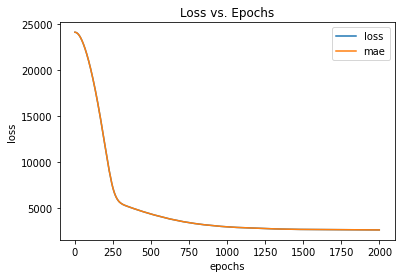

In [37]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_4.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.title("Loss vs. Epochs")

In [38]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


Looks like after normalization, we need to increase the number of epochs because there is a steep drop until about 250 epochs, followed by a less steep drop until 1250 epochs. After which, it appears to flat line.

In [39]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"), #adding this causes the loss to drop a lot
  tf.keras.layers.Dense(1)
])

# Compile the model
model_5.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 2000 epochs (same as model_3)
history_5 = model_5.fit(X_train_normal, y_train, epochs=2000)

Epoch 1/2000
24/24 [==============================] - 1s 4ms/step - loss: 24156.8438 - mae: 24156.8438
Epoch 2/2000
24/24 [==============================] - 0s 4ms/step - loss: 24156.3633 - mae: 24156.3633
Epoch 3/2000
24/24 [==============================] - 0s 4ms/step - loss: 24155.4785 - mae: 24155.4785
Epoch 4/2000
24/24 [==============================] - 0s 3ms/step - loss: 24153.7109 - mae: 24153.7109
Epoch 5/2000
24/24 [==============================] - 0s 3ms/step - loss: 24150.4258 - mae: 24150.4258
Epoch 6/2000
24/24 [==============================] - 0s 4ms/step - loss: 24144.9453 - mae: 24144.9453
Epoch 7/2000
24/24 [==============================] - 0s 4ms/step - loss: 24136.4375 - mae: 24136.4375
Epoch 8/2000
24/24 [==============================] - 0s 4ms/step - loss: 24124.1348 - mae: 24124.1348
Epoch 9/2000
24/24 [==============================] - 0s 4ms/step - loss: 24107.4336 - mae: 24107.4336
Epoch 10/2000
24/24 [==============================] - 0s 4ms/step - loss

In [40]:
model_5.evaluate(X_test_normal,y_test)

8/8 [==============================] - 0s 3ms/step - loss: 2718.8311 - mae: 2718.8311


[2718.8310546875, 2718.8310546875]

Text(0.5, 1.0, 'Loss vs. Epochs')

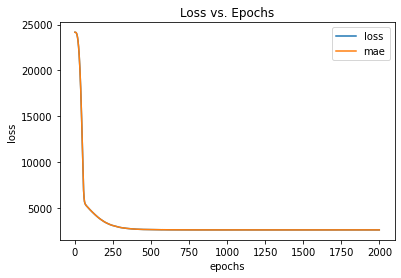

In [41]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_5.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.title("Loss vs. Epochs")

In [42]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 2,121
Trainable params: 2,121
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 1000, 1 units)
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="sigmoid"),
  tf.keras.layers.Dense(1000, activation="relu"), #adding this causes the loss to drop a lot
  tf.keras.layers.Dense(1)
])

# Compile the model
model_6.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 2000 epochs (same as model_3)
history_6 = model_6.fit(X_train_normal, y_train, epochs=150)

Epoch 1/150
24/24 [==============================] - 1s 7ms/step - loss: 24146.2891 - mae: 24146.2891
Epoch 2/150
24/24 [==============================] - 0s 6ms/step - loss: 24106.7305 - mae: 24106.7305
Epoch 3/150
24/24 [==============================] - 0s 6ms/step - loss: 24022.8789 - mae: 24022.8789
Epoch 4/150
24/24 [==============================] - 0s 7ms/step - loss: 23874.6094 - mae: 23874.6094
Epoch 5/150
24/24 [==============================] - 0s 6ms/step - loss: 23643.8438 - mae: 23643.8438
Epoch 6/150
24/24 [==============================] - 0s 6ms/step - loss: 23315.5371 - mae: 23315.5371
Epoch 7/150
24/24 [==============================] - 0s 6ms/step - loss: 22877.7402 - mae: 22877.7402
Epoch 8/150
24/24 [==============================] - 0s 7ms/step - loss: 22323.8125 - mae: 22323.8125
Epoch 9/150
24/24 [==============================] - 0s 6ms/step - loss: 21652.1699 - mae: 21652.1699
Epoch 10/150
24/24 [==============================] - 0s 6ms/step - loss: 20858.07

In [44]:
model_6.evaluate(X_test_normal,y_test)

8/8 [==============================] - 0s 3ms/step - loss: 2802.8860 - mae: 2802.8860


[2802.885986328125, 2802.885986328125]

In [45]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               1100      
_________________________________________________________________
dense_11 (Dense)             (None, 1000)              101000    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 1001      
Total params: 103,101
Trainable params: 103,101
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 1.0, 'Loss vs. Epochs')

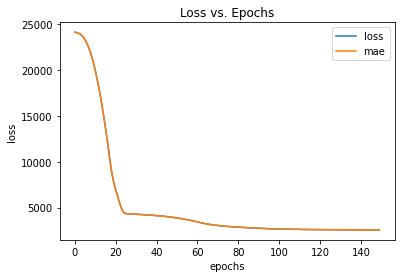

In [46]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_6.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.title("Loss vs. Epochs")

Well...we didn't reduce the loss much, but we did but we did get the solution to solve in fewer epochs (i.e. faster).

In [47]:
predictions = model_6.predict(X_test_normal)

In [48]:
X_test_normal[0]

array([0.66666667, 0.        , 0.        , 0.        , 0.        ,
       0.47619048, 0.40740741, 1.        , 1.        , 0.33333333])

In [49]:
X_test

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
613,50,0,0,0,0,165,84,1,1,1
451,39,0,0,0,1,185,73,1,1,1
731,65,1,1,0,0,165,87,0,0,0
436,29,0,0,0,0,179,70,0,1,1
275,48,1,1,0,0,171,84,1,0,0
...,...,...,...,...,...,...,...,...,...,...
597,55,0,1,0,0,172,91,1,0,1
204,27,0,1,0,0,159,120,1,1,1
514,39,1,1,0,0,169,78,0,0,0
628,24,1,0,0,0,170,87,0,0,1


In [50]:
X_test.iloc[0]

Age                         50
Diabetes                     0
BloodPressureProblems        0
AnyTransplants               0
AnyChronicDiseases           0
Height                     165
Weight                      84
KnownAllergies               1
HistoryOfCancerInFamily      1
NumberOfMajorSurgeries       1
Name: 613, dtype: int64

In [51]:
y_test

613    31000
451    31000
731    29000
436    15000
275    23000
       ...  
597    29000
204    39000
514    23000
628    15000
945    29000
Name: PremiumPrice, Length: 247, dtype: int64

In [52]:
y_test.shape

(247,)

In [53]:
predictions[0]

array([26725.785], dtype=float32)

In [54]:
y_test.iloc[0] - predictions[0]

array([4274.215], dtype=float32)

In [55]:
#let's see what actual price vs predicted price is and what the loss/difference is.
losses = []
for i in range(0,len(predictions)):
  print(f"Actual price: {y_test.iloc[i]}, Predicted Price: {predictions[i]}, and loss: {y_test.iloc[i] - predictions[i]}")
  losses.append(abs(y_test.iloc[i] - predictions[i]))

print(f"The mean average loss is {np.mean(losses)}")

Actual price: 31000, Predicted Price: [26725.785], and loss: [4274.215]
Actual price: 31000, Predicted Price: [25272.39], and loss: [5727.6094]
Actual price: 29000, Predicted Price: [28888.572], and loss: [111.427734]
Actual price: 15000, Predicted Price: [19665.055], and loss: [-4665.0547]
Actual price: 23000, Predicted Price: [24907.105], and loss: [-1907.1055]
Actual price: 29000, Predicted Price: [25787.139], and loss: [3212.8613]
Actual price: 25000, Predicted Price: [24682.781], and loss: [317.21875]
Actual price: 23000, Predicted Price: [21127.168], and loss: [1872.832]
Actual price: 28000, Predicted Price: [26892.572], and loss: [1107.4277]
Actual price: 28000, Predicted Price: [28934.096], and loss: [-934.0957]
Actual price: 21000, Predicted Price: [22562.395], and loss: [-1562.3945]
Actual price: 30000, Predicted Price: [26145.01], and loss: [3854.9902]
Actual price: 15000, Predicted Price: [15202.873], and loss: [-202.87305]
Actual price: 15000, Predicted Price: [18425.146],

In [56]:
losses

[array([4274.215], dtype=float32),
 array([5727.6094], dtype=float32),
 array([111.427734], dtype=float32),
 array([4665.0547], dtype=float32),
 array([1907.1055], dtype=float32),
 array([3212.8613], dtype=float32),
 array([317.21875], dtype=float32),
 array([1872.832], dtype=float32),
 array([1107.4277], dtype=float32),
 array([934.0957], dtype=float32),
 array([1562.3945], dtype=float32),
 array([3854.9902], dtype=float32),
 array([202.87305], dtype=float32),
 array([3425.1465], dtype=float32),
 array([9702.236], dtype=float32),
 array([2066.9727], dtype=float32),
 array([341.86523], dtype=float32),
 array([5977.4844], dtype=float32),
 array([148.46289], dtype=float32),
 array([3529.6797], dtype=float32),
 array([7837.4805], dtype=float32),
 array([1189.0635], dtype=float32),
 array([4.857422], dtype=float32),
 array([4099.25], dtype=float32),
 array([9233.211], dtype=float32),
 array([2466.2188], dtype=float32),
 array([522.1211], dtype=float32),
 array([4246.043], dtype=float32),
 

In [57]:
print(f"The max loss is {tf.reduce_max(losses)} and min loss is {tf.reduce_min(losses)}")

The max loss is 18927.416015625 and min loss is 4.857421875


# THE END